In [34]:
import torch
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap


Board = torch.ones((8, 8))
# Board[1:2] = 2
# print(Board)
Board[6:7] = 0
Board[1:2] = 0

white_pawn = {"p1":(6,0),"p2":(6,1),"p3":(6,2),"p4":(6,3),"p5":(6,4),"p6":(6,5),"p7":(6,6),"p8":(6,7)}
black_pawn = {"p1":(1,0),"p2":(1,1),"p3":(1,2),"p4":(1,3),"p5":(1,4),"p6":(1,5),"p7":(1,6),"p8":(1,7)}

6
tensor(1.)


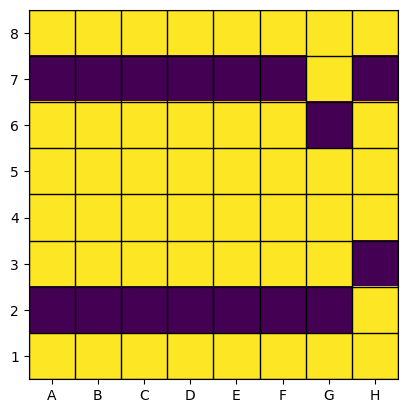

{6: tensor(1.)}
1
tensor(1.)


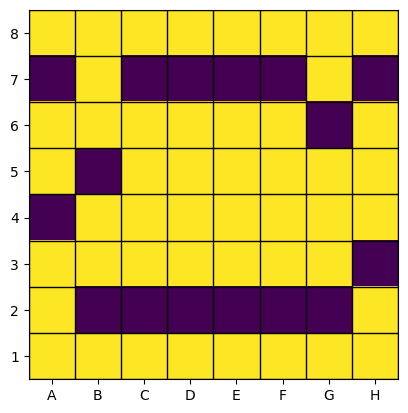

{6: tensor(1.), 1: tensor(1.)}
7
tensor(1.)


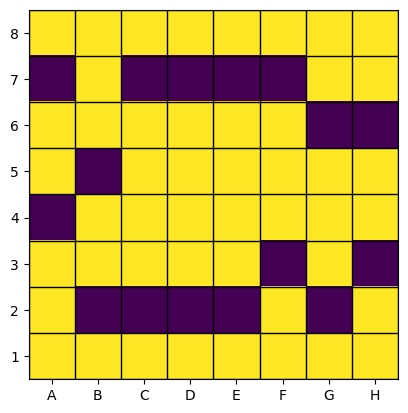

{6: tensor(1.), 1: tensor(1.), 7: tensor(1.)}
2
tensor(1.)


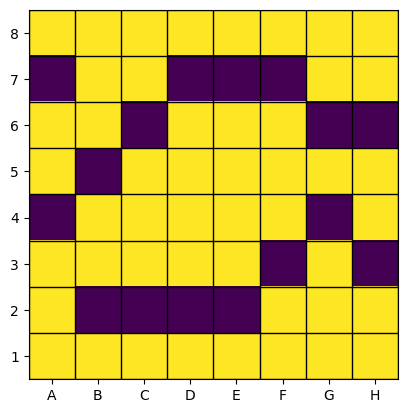

{6: tensor(1.), 1: tensor(1.), 7: tensor(1.), 2: tensor(1.)}
6
tensor(1.)


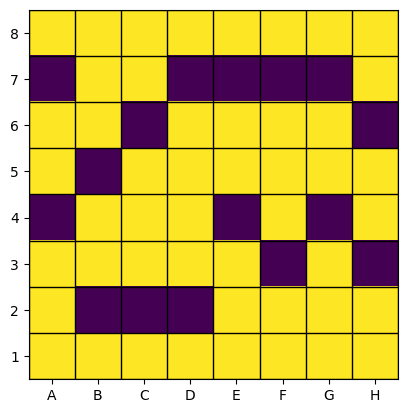

{6: tensor(1.), 1: tensor(1.), 7: tensor(1.), 2: tensor(1.)}


KeyError: 7

In [35]:
prev_value_black = {}
prev_value_white = {}

for i in range(64):
    random_piece = random.choice(list(white_pawn.values()))
    l_white = random_piece

    random_piece = random.choice(list(black_pawn.values()))
    l_black = random_piece

    # print(l)

    tup1 = (1, 0)
    tup2 = (2, 0)

    def first_move_white(l_white):
        m = torch.randint(0, 2, (1,))
        if m.item() == 0:
            return tuple(l_white[i] - tup1[i] for i in range(len(l_white)))
        else:
            return tuple(l_white[i] - tup2[i] for i in range(len(l_white)))

    def next_move_white(l):
        return tuple(l_white[i] - tup1[i] for i in range(len(l_white)))
    


    def first_move_black(l_black):
        m = torch.randint(0, 2, (1,))
        if m.item() == 0:
            return tuple(l_black[i] + tup1[i] for i in range(len(l_black)))
        else:
            return tuple(l_black[i] + tup2[i] for i in range(len(l_black)))

    def next_move_black(l_black):
        return tuple(l_black[i] - tup1[i] for i in range(len(l_black)))

    def get_keys_from_value(d, target_value):
        return [k for k, v in d.items() if v == target_value]
    
    def Board_display():

        board_np = Board.numpy()
        fig, ax = plt.subplots()
        ax.imshow(board_np)

        # Grid
        ax.set_xticks(torch.arange(-0.5, 8, 1), minor=True)
        ax.set_yticks(torch.arange(-0.5, 8, 1), minor=True)
        ax.grid(which="minor", color="black", linestyle='-', linewidth=1)
        ax.tick_params(which="minor", bottom=False, left=False)

        ax.set_yticks(range(8))
        ax.set_yticklabels([str(i) for i in range(8, 0,-1)])

        ax.set_xticks(range(8))
        ax.set_xticklabels(list("abcdefgh".upper()))

        plt.show()

    # for white piece
    if l_white[0] == 6:
        t_white = first_move_white(l_white)
        Board[l_white] = 1
    else:
        t_white = next_move_white(l_white)
        # print(Board[l])
        Board[l_white] = prev_value_white[l_white[1]]


    # for black piece
    if l_black[0] == 1:
        t_black = first_move_black(l_black)
        Board[l_black] = 1
    else:
        t_black = next_move_black(l_black)
        # print(Board[l])
        Board[l_black] = prev_value_black[l_black[1]]

    # print(t)
    prev_value_black[l_black[1]] = Board[l_black]
    print(l_black[1])
    print(prev_value_black[l_black[1]])

    # print(prev_value)

    Board[t_white] = 0
    Board[t_black] = 0

    key_white = get_keys_from_value(white_pawn, l_white)[0]
    key_black = get_keys_from_value(black_pawn, l_black)[0]

    white_pawn[key_white] = t_white
    black_pawn[key_black] = t_black

    # plt.imshow(Board)
    # print(white_pawn)

    Board_display()
    print(prev_value_black)


In [ ]:
chars = ['A', 'B','C','D','E','F','G','H']
stoi = {s:i for i,s in enumerate(chars)} # mapping numbers from character to create board
stoi

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7}